<a href="https://colab.research.google.com/github/uhsipra/AntiVaCCers/blob/main/Uzair_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#Testing ground for social media analysis using Natural Language Processing


In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
 

In [ ]:
uploaded = files.upload()

Saving Login.csv to Login.csv


In [ ]:
consumerKey = 'TglrphF6pJ6rIAiHOFeAOWokt'
consumerSecret = 'PFztNhfsG8O3G0QAF0rUwemIWsujokkHAkdmopjnfJU9HyelT2'
accessKey = 'TglrphF6pJ6rIAiHOFeAOWokt'
accessSecret = 'PFztNhfsG8O3G0QAF0rUwemIWsujokkHAkdmopjnfJU9HyelT2'

In [ ]:
authenticate = tweepy.OAuthHandler('TglrphF6pJ6rIAiHOFeAOWokt', 'PFztNhfsG8O3G0QAF0rUwemIWsujokkHAkdmopjnfJU9HyelT2')

In [ ]:
 authenticate.set_access_token(accessKey,accessSecret)

In [ ]:
api = tweepy.API(authenticate, wait_on_rate_limit= True)

In [ ]:
#extract 100 tweets from bill gates.

posts = api.user_timeline(screen_name="BillGates", count = 5,lang= "en", tweet_mode="extended")

TweepError: ignored

In [ ]:
import webbrowser

In [ ]:
import time

In [ ]:
consumerKey = "TglrphF6pJ6rIAiHOFeAOWokt"
consumerSecret = "PFztNhfsG8O3G0QAF0rUwemIWsujokkHAkdmopjnfJU9HyelT2"

In [ ]:
callback_uri  = "oob"

In [ ]:
auth = tweepy.OAuthHandler(consumerKey,consumerSecret, callback_uri)

In [ ]:
redirect_url = auth.get_authorization_url()
print(redirect_url)

https://api.twitter.com/oauth/authorize?oauth_token=XooBZwAAAAABYJ00AAABfmCZ0Ug


In [ ]:
webbrowser.open(redirect_url)

False

In [ ]:
user_pint_value = '9709064'

In [ ]:
auth.get_access_token(user_pint_value)

('900124578717999104-FKhnxgY6nsiQjYWw2DBHCaugoDNyrFG',
 'xklh1e3aDFChlHTgjAJuj3Br3kbX8X9YLyfwUr2gySD7w')

In [ ]:
api =tweepy.API(auth)

In [ ]:
me = api.me()

TweepError: ignored

In [ ]:
posts = api.user_timeline(screen_name="BillGates", count = 100,lang= "en", tweet_mode="extended")

In [ ]:
posts

[Status(_api=<tweepy.api.API object at 0x7f1826430650>, _json={'created_at': 'Fri Jan 14 00:30:58 +0000 2022', 'id': 1481785879068692483, 'id_str': '1481785879068692483', 'full_text': 'The fight to eradicate HIV is far from over, but incredible progress has been made through scientific innovation, activism, and collective global action. These lessons provide a path forward with COVID-19 and hope for preventing the next pandemic. https://t.co/ztb8d6BHZP', 'truncated': False, 'display_text_range': [0, 271], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/ztb8d6BHZP', 'expanded_url': 'https://b-gat.es/3I4cMXH', 'display_url': 'b-gat.es/3I4cMXH', 'indices': [248, 271]}]}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 50393960, 'id_

In [ ]:
print("Show the 5 recent tweets: \m")
i=1
for tweet in posts[0:5]:
  print(str(i)+') ' + tweet.full_text +'\n')
  i = i + 1

Show the 5 recent tweets: \m
1) The fight to eradicate HIV is far from over, but incredible progress has been made through scientific innovation, activism, and collective global action. These lessons provide a path forward with COVID-19 and hope for preventing the next pandemic. https://t.co/ztb8d6BHZP

2) ICYMI here’s a recap of my conversation with @devisridhar. We chatted about this pandemic, how to prevent the next one, and a few things in between. https://t.co/UKOGoXm9EL

3) Thanks @devisridhar for taking the time today to discuss omicron, vaccines, and how the world can come together to prevent the next pandemic. https://t.co/WY5P7xluwe

4) RT @devisridhar: @BillGates @gavi @WHO @CDCgov @trvrb @DrTedros We definitely can. Thanks for your time &amp; insights &amp; let's continue the goo…

5) @devisridhar @gavi @WHO @CDCgov @trvrb .@DrTedros  has started the conversation about how we avoid the next pandemic which is important. I appreciate your work on this. We can do a lot better 

In [ ]:
#Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['tweets'])

In [ ]:
df.head(
)

,tweets
0,"The fight to eradicate HIV is far from over, b..."
1,ICYMI here’s a recap of my conversation with @...
2,Thanks @devisridhar for taking the time today ...
3,RT @devisridhar: @BillGates @gavi @WHO @CDCgov...
4,@devisridhar @gavi @WHO @CDCgov @trvrb .@DrTed...


In [ ]:
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #removes @mentions
  text = re.sub(r'#[A-Za-z0-9]+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?:\/\/\S+', '', text)
  return text


In [ ]:
import re

In [ ]:
df['tweets'] = df['tweets'].apply(cleanTxt)

In [ ]:
df.head()

,tweets
0,"The fight to eradicate HIV is far from over, b..."
1,ICYMI here’s a recap of my conversation with ....
2,Thanks for taking the time today to discuss o...
3,: We definitely can. Thanks for your tim...
4,. has started the conversation about how...


In [ ]:
# Create a function to get subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
df['subjectivity'] = df['tweets'].apply(getSubjectivity)
df['polarity'] = df['tweets'].apply(getPolarity)

In [ ]:
df

,tweets,subjectivity,polarity
0,"The fight to eradicate HIV is far from over, b...",0.400000,0.220000
1,ICYMI here’s a recap of my conversation with ....,0.050000,-0.100000
2,Thanks for taking the time today to discuss o...,0.100000,0.100000
3,: We definitely can. Thanks for your tim...,0.350000,0.100000
4,. has started the conversation about how...,0.375000,0.225000
...,...,...,...
95,. Energy Catalyst is bringing together private...,0.360417,0.041667
96,Unless smallholder farmers can adapt to climat...,0.250000,0.104167
97,"Thank you, . This $1B partnership between Ene...",0.800000,0.000000
98,: Had an excellent meeting with at the Summi...,0.700000,0.450000


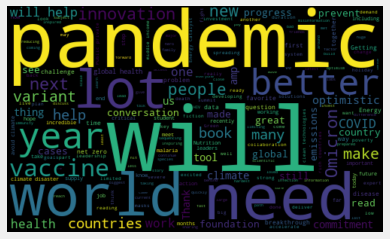

In [ ]:
#plot the word cloud
allWords = ' '.join([twts for twts in df['tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [ ]:
me = api.me()

In [ ]:
print(me.screen_name)

GucciPickle8


In [ ]:
dir(api)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_list_members',
 '_lookup_friendships',
 '_pack_image',
 '_remove_list_members',
 '_send_direct_message',
 'add_list_member',
 'add_list_members',
 'api_root',
 'auth',
 'blocks',
 'blocks_ids',
 'cache',
 'cached_result',
 'compression',
 'configuration',
 'create_block',
 'create_favorite',
 'create_friendship',
 'create_list',
 'create_media_metadata',
 'create_mute',
 'create_saved_search',
 'destroy_block',
 'destroy_direct_message',
 'destroy_favorite',
 'destroy_friendship',
 'destroy_list',
 'destroy_mute',
 'destroy_saved_search',
 'destroy_status',
 'favorites',
 'followers',
 'followers_ids',
 'friends',
 

In [157]:
postsAB = api.search("covid Alberta",count =100,lang= "en", tweet_mode="extended")
postsBC = api.search("covid BC",count =100,lang= "en", tweet_mode="extended")
postsMB = api.search("covid Manitoba",count =100,lang= "en", tweet_mode="extended")
postsSK = api.search("covid Sasketchewan",count =100,lang= "en", tweet_mode="extended")
postsON = api.search("covid Ontario",count =100,lang= "en", tweet_mode="extended")
postsQC = api.search("covid quebec",count =100,lang= "en", tweet_mode="extended")

In [166]:
len(postsSK)

100

In [165]:
postsSK = api.search("covid Saskatchewan",count =100,lang= "en", tweet_mode="extended")

In [150]:
print("Show the 5 recent tweets: \m")
i=1
for tweet in posts[0:5]:
  print(str(i)+') ' + tweet.full_text +'\n')
  i = i + 1

Show the 5 recent tweets: \m
1) Well this um, aged. Covid killed the scene an hour before I was supposed to check into the hotel to quarantine. I'm a background actor and today is actually my 2 year anniversary of the best job I ever loved. I had to step back from it bc I can't find childcare. Then this got cx https://t.co/NdEk4QvfR3

2) i’ve been stuck in my room for the past few days bc covid &amp; i went down stairs today for the first time &amp; my doggies were so excited &amp; happy 2 see me &amp; my pups literally looked like they had smiles on their faces i almost CRIED i miSS MY ANIMALS

3) @SteveTrendell46 We are currently in Salt Lake City.  Just had a beauty dinner.  Life is a lot better when we're working down here.  Ran Canada out to BC.  Stupid Covid rules.  Left BC and running USA back into Ontario and it's like Covid doesn't exist. Canada sucks.

4) it’s hard having to set so many boundaries with hanging out with people bc of covid. idc how it makes me look trying to ke

In [ ]:
!pip install config